<a href="https://colab.research.google.com/github/mahananda123/Sign_Language_Recognition_Using_CNN/blob/main/SignLanguageRecognition_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16

In [4]:
import tensorflow as tf

# Specify the path to your custom dataset
data_path = '/content/drive/MyDrive/CNN Architecture/original_images'

# Load the data
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_path,
    labels='inferred',
    label_mode='categorical',
    image_size=(165, 165),
    batch_size=450,
    validation_split=0.8,  # Use validation_split for splitting into training and validation sets
    subset='training',  # Subset for training data
    seed=42
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_path,
    labels='inferred',
    label_mode='categorical',
    image_size=(165, 165),
    batch_size=70,
    validation_split=0.2,
    subset='validation',  # Subset for validation data
    seed=42
)


Found 5852 files belonging to 36 classes.
Using 1171 files for training.
Found 5852 files belonging to 36 classes.
Using 1170 files for validation.


In [5]:
# Preprocess the data
train_data = train_data.map(lambda x, y: (x / 255.0, y))
test_data = test_data.map(lambda x, y: (x / 255.0, y))

In [6]:
# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(165,165, 3))

# Freeze the pre-trained layers so they are not updated during training
base_model.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [7]:
# Create the model
model = Sequential()
model.add(Conv2D(16, kernel_size=(2,2), activation='relu', input_shape=(165,165, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=(165,165, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(36, activation='softmax'))

In [8]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
# Train the model
model_hist=model.fit(train_data,validation_data=(test_data),epochs=50)

Epoch 1/50
3/3 [==============================] - 280s 67s/step - loss: 3.2224 - accuracy: 0.1597 - val_loss: 2.5651 - val_accuracy: 0.1282
Epoch 2/50
3/3 [==============================] - 65s 23s/step - loss: 2.4141 - accuracy: 0.1682 - val_loss: 1.9628 - val_accuracy: 0.1598
Epoch 3/50
3/3 [==============================] - 55s 18s/step - loss: 2.1352 - accuracy: 0.1793 - val_loss: 1.8746 - val_accuracy: 0.2256
Epoch 4/50
3/3 [==============================] - 64s 22s/step - loss: 2.0403 - accuracy: 0.1973 - val_loss: 1.8529 - val_accuracy: 0.1991
Epoch 5/50
3/3 [==============================] - 64s 22s/step - loss: 1.9499 - accuracy: 0.1921 - val_loss: 1.8302 - val_accuracy: 0.1385
Epoch 6/50
3/3 [==============================] - 64s 23s/step - loss: 1.9194 - accuracy: 0.1913 - val_loss: 1.7710 - val_accuracy: 0.2778
Epoch 7/50
3/3 [==============================] - 74s 26s/step - loss: 1.8435 - accuracy: 0.2263 - val_loss: 1.7049 - val_accuracy: 0.4598
Epoch 8/50
3/3 [==========

In [10]:
# Evaluate the model
model_hist.evaluate(test_data)

17/17 [==============================] - 16s 764ms/step - loss: 0.1860 - accuracy: 0.9778


[0.18602535128593445, 0.9777777791023254]

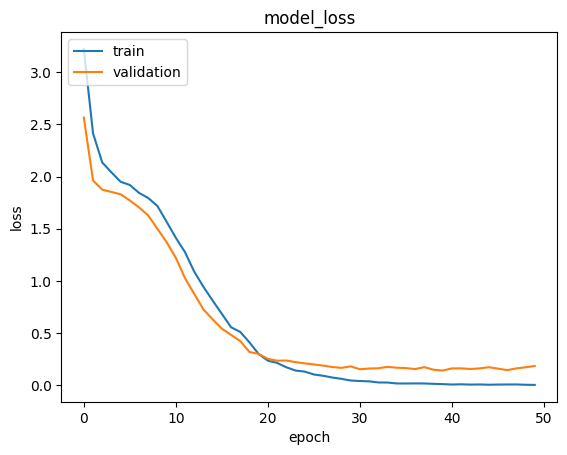

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(model_hist.history['loss'])
plt.plot(model_hist.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

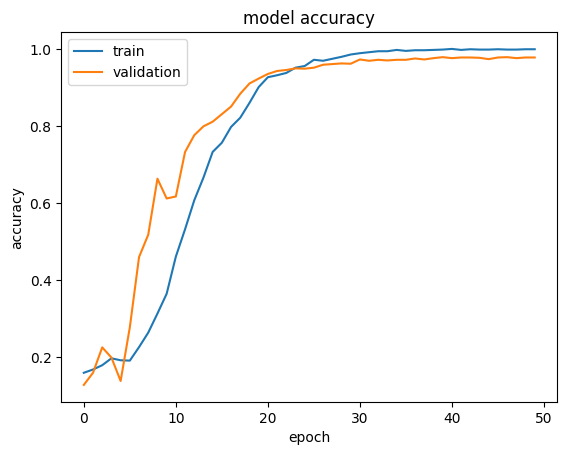

In [12]:
plt.plot(model_hist.history['accuracy'])
plt.plot(model_hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model_hist.save('research')